In [34]:
# Data Manipulation Libraries
import pandas as pd

# Data Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Mechine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Others 
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


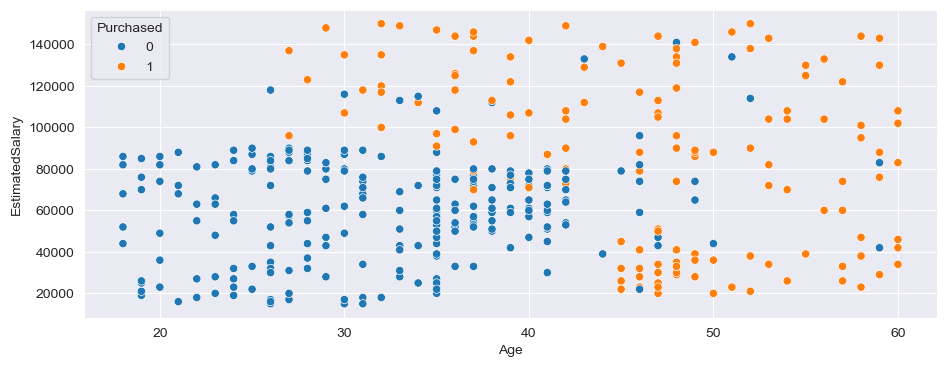

In [36]:
plt.figure(figsize=(11,4))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue='Purchased')
plt.show()

# Best Model Selection

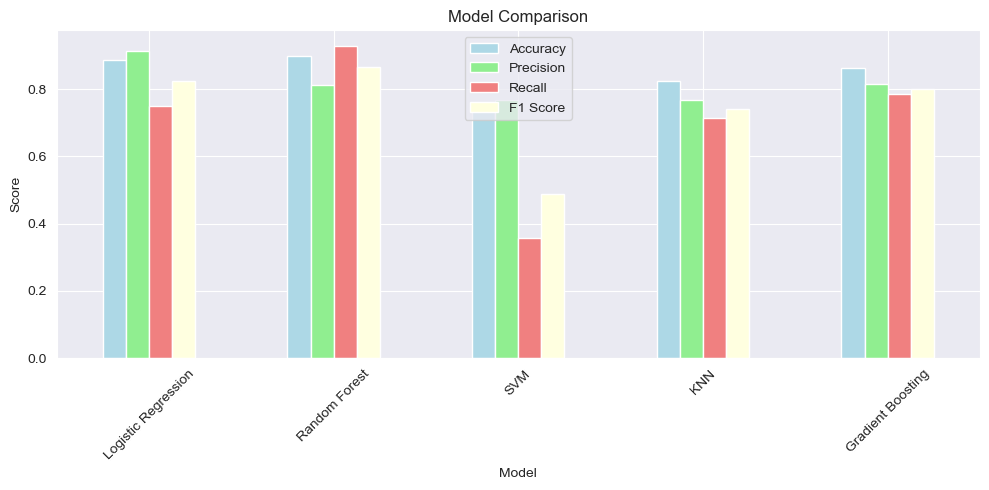

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.8875,0.913043,0.750000,0.823529
Random Forest,0.9000,0.812500,0.928571,0.866667
SVM,0.7375,0.769231,0.357143,0.487805
KNN,0.8250,0.769231,0.714286,0.740741
Gradient Boosting,0.8625,0.814815,0.785714,0.800000


In [62]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Encode categorical variables (PlacementStatus)
encoder = LabelEncoder()
df['Purchased'] = encoder.fit_transform(df['Purchased'])

# Step 3: Select features and target variable
X = df.drop(columns='Purchased')  # Use only numerical columns
y = df['Purchased']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Step 6: Train models and evaluate performance
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # FIX — Explicitly set positive class to avoid metric errors
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    accuracy = accuracy_score(y_test, y_pred)

    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Step 7: Create a DataFrame
results_df = pd.DataFrame(model_results).T

# Step 8: Plot comparison (FIX — remove plt.figure())
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    figsize=(10, 5),
    color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display results
results_df


In [39]:
x = df.drop(columns='Purchased')
y = df['Purchased']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Successfully completed.")

Successfully completed.


In [54]:
lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression()

In [56]:
print(f"Model Accuracy: {lor.score(x_test, y_test)*100: .2f}%")

Model Accuracy:  88.75%


In [58]:
lor.predict([[19, 19000]])

array([0], dtype=int64)

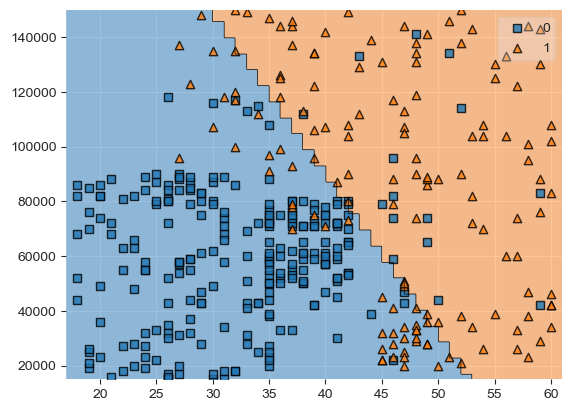

In [66]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lor)
plt.show()